In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [2]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """

df1 = pd.read_csv('./data/train.csv')
df2 = pd.read_csv('./data/test.csv')
df = df1.append(df2)
df = df.reset_index()

print(df)

      index    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0         0  1431          60       RL         60.0    21930   Pave   NaN   
1         1   757          60       RL         68.0    10769   Pave   NaN   
2         2   632         120       RL         34.0     4590   Pave   NaN   
3         3  1193          50       RM         60.0     9600   Pave  Grvl   
4         4   773          80       RL         94.0     7819   Pave   NaN   
...     ...   ...         ...      ...          ...      ...    ...   ...   
1455    360  1327          30       RH         70.0     4270   Pave   NaN   
1456    361  1154          30       RM          NaN     5890   Pave   NaN   
1457    362   665          20       RL         49.0    20896   Pave   NaN   
1458    363  1259          80       RL         59.0     9587   Pave   NaN   
1459    364  1122          20       RL         84.0    10084   Pave   NaN   

     LotShape LandContour  ... PoolArea PoolQC  Fence MiscFeature MiscVal  

## 分離目標

In [3]:
# 將目標分析欄位取出來 LotFrontage, GarageYrBlt, MasVnrArea
""" Your code hear: """
LotFrontage = pd.DataFrame()
GarageYrBlt = pd.DataFrame()
MasVnrArea = pd.DataFrame()
LotFrontage['origin'] = df['LotFrontage']
GarageYrBlt['origin'] = df['GarageYrBlt']
MasVnrArea['origin'] = df['MasVnrArea']

print(LotFrontage)

      origin
0       60.0
1       68.0
2       34.0
3       60.0
4       94.0
...      ...
1455    70.0
1456     NaN
1457    49.0
1458    59.0
1459    84.0

[1460 rows x 1 columns]


In [4]:
# 填補缺失值：平均值

mean = LotFrontage['origin'].mean()
LotFrontage['mean'] = LotFrontage['origin'].fillna(mean)
print(LotFrontage['origin'].fillna(mean))

mean = GarageYrBlt['origin'].mean()
GarageYrBlt['mean'] = GarageYrBlt['origin'].fillna(mean)

mean = MasVnrArea['origin'].mean()
MasVnrArea['mean'] = MasVnrArea['origin'].fillna(mean)

0       60.000000
1       68.000000
2       34.000000
3       60.000000
4       94.000000
          ...    
1455    70.000000
1456    70.049958
1457    49.000000
1458    59.000000
1459    84.000000
Name: origin, Length: 1460, dtype: float64


In [5]:
# 填補缺失值：中位數

median = LotFrontage['origin'].median()
LotFrontage['median'] = LotFrontage['origin'].fillna(median)
print(LotFrontage)

median = GarageYrBlt['origin'].median()
GarageYrBlt['median'] = GarageYrBlt['origin'].fillna(median)

median = MasVnrArea['origin'].median()
MasVnrArea['median'] = MasVnrArea['origin'].fillna(median)

      origin       mean  median
0       60.0  60.000000    60.0
1       68.0  68.000000    68.0
2       34.0  34.000000    34.0
3       60.0  60.000000    60.0
4       94.0  94.000000    94.0
...      ...        ...     ...
1455    70.0  70.000000    70.0
1456     NaN  70.049958    69.0
1457    49.0  49.000000    49.0
1458    59.0  59.000000    59.0
1459    84.0  84.000000    84.0

[1460 rows x 3 columns]


## 繪圖

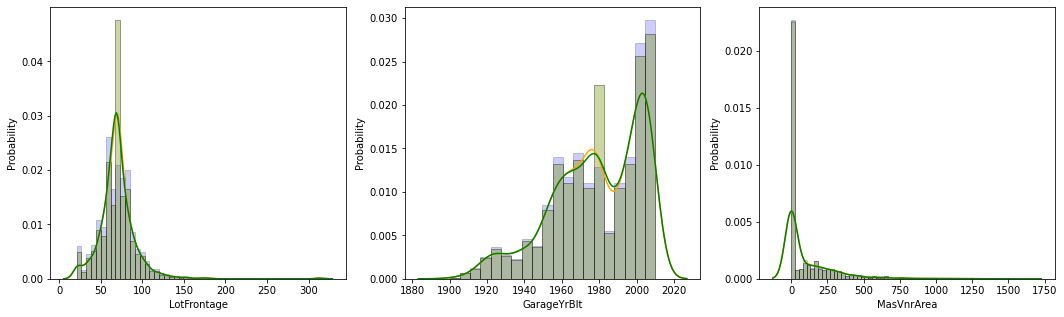

In [12]:
# 繪圖
""" Your code hear: """
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 5))

ax1.hist(LotFrontage['origin'], bins=50, density=True, edgecolor='k', alpha=0.2, color='blue')
ax1.hist(LotFrontage['mean'], bins=50, density=True, edgecolor='k', alpha=0.2, color='orange')
ax1.hist(LotFrontage['median'], bins=50, density=True, edgecolor='k', alpha=0.2, color='green')
sns.kdeplot(LotFrontage['mean'], ax=ax1, color='orange')
sns.kdeplot(LotFrontage['median'], ax=ax1, color='green')
ax1.set_xlabel('LotFrontage')
ax1.set_ylabel('Probability')

ax2.hist(GarageYrBlt['origin'], bins=20, density=True, edgecolor='k', alpha=0.2, color='blue')
ax2.hist(GarageYrBlt['mean'], bins=20, density=True, edgecolor='k', alpha=0.2, color='orange')
ax2.hist(GarageYrBlt['median'], bins=20, density=True, edgecolor='k', alpha=0.2, color='green')
sns.kdeplot(GarageYrBlt['mean'], ax=ax2, color='orange')
sns.kdeplot(GarageYrBlt['median'], ax=ax2, color='green')
ax2.set_xlabel('GarageYrBlt')
ax2.set_ylabel('Probability')

ax3.hist(MasVnrArea['origin'], bins=60, density=True, edgecolor='k', alpha=0.2, color='blue')
ax3.hist(MasVnrArea['mean'], bins=60, density=True, edgecolor='k', alpha=0.2, color='orange')
ax3.hist(MasVnrArea['median'], bins=60, density=True, edgecolor='k', alpha=0.2, color='green')
sns.kdeplot(MasVnrArea['mean'], ax=ax3, color='orange')
sns.kdeplot(MasVnrArea['median'], ax=ax3, color='green')
ax3.set_xlabel('MasVnrArea')
ax3.set_ylabel('Probability')

plt.show()

## 分析標準差

In [13]:
""" Your code hear: """
print("LotFrontage")
print(LotFrontage.std())
print("\nGarageYrBlt")
print(GarageYrBlt.std())
print("\nMasVnrArea")
print(MasVnrArea.std())

LotFrontage
origin    24.284752
mean      22.024023
median    22.027677
dtype: float64

GarageYrBlt
origin    24.689725
mean      23.994583
median    23.997022
dtype: float64

MasVnrArea
origin    181.066207
mean      180.569112
median    180.731373
dtype: float64


## 透過分析標準差可以得到什麼結果？

可看出資料密度的變化，標準差變得越多，表示ㄑ